In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, f1_score 
from sklearn.metrics import make_scorer, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

%matplotlib inline



In [ ]:


# Load data.
test = pd.read_csv('/content/test values.csv')
train = pd.read_csv('/content/Train value with labels.csv')




In [ ]:
#join all the data together
data = pd.concat([train.set_index('id'), test.set_index('id')]).reset_index(drop=True)

In [ ]:
data.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             74250 non-null  float64
 1   date_recorded          74250 non-null  object 
 2   funder                 69746 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   installer              69718 non-null  object 
 5   longitude              74250 non-null  float64
 6   latitude               74250 non-null  float64
 7   wpt_name               74250 non-null  object 
 8   num_private            74250 non-null  int64  
 9   basin                  74250 non-null  object 
 10  subvillage             73780 non-null  object 
 11  region                 74250 non-null  object 
 12  region_code            74250 non-null  int64  
 13  district_code          74250 non-null  int64  
 14  lga                    74250 non-null  object 
 15  wa

In [ ]:
data.shape

(74250, 40)

In [ ]:
data.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [ ]:
data.tail(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
74247,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN
74248,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN
74249,0.0,2013-02-13,Government Of Tanzania,481,Government,34.765054,-11.226012,Kwa Mzee Chagala,0,Lake Nyasa,Kamba,Ruvuma,10,3,Mbinga,Mbamba bay,40,True,GeoData Consultants Ltd,VWC,DANIDA,True,2008,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,NaN


In [ ]:

!pip install pandas-profiling==2.7.1


In [ ]:
import pandas_profiling
# Generate a profile report of the data to examine. 
pandas_profiling.ProfileReport(data)

In [ ]:
# Generate a profile report of the data to examine. 
pandas_profiling.ProfileReport(test)

In [ ]:
data['region_code'].value_counts()

11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
4     3145
1     2779
13    2536
14    2488
20    2451
15    2242
6     2032
21    1972
80    1536
60    1298
90    1133
7     1020
99     512
9      499
24     402
8      375
40       1
Name: region_code, dtype: int64

In [ ]:
data['region'].value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

In [ ]:
data['district_code'].value_counts()

1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64

In [ ]:
data['lga'].value_counts()

Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
                ... 
Moshi Urban      103
Kigoma Urban      95
Arusha Urban      82
Lindi Urban       24
Nyamagana          2
Name: lga, Length: 125, dtype: int64

In [ ]:
data['scheme_name'].value_counts()

K                        858
None                     794
Borehole                 704
Chalinze wate            501
M                        490
                        ... 
BL Moniko shule            1
Chepete water supply       1
Iwil                       1
Kianama spring source      1
BL Majengo                 1
Name: scheme_name, Length: 2868, dtype: int64

***** 'region' feature distribution breakdown *****


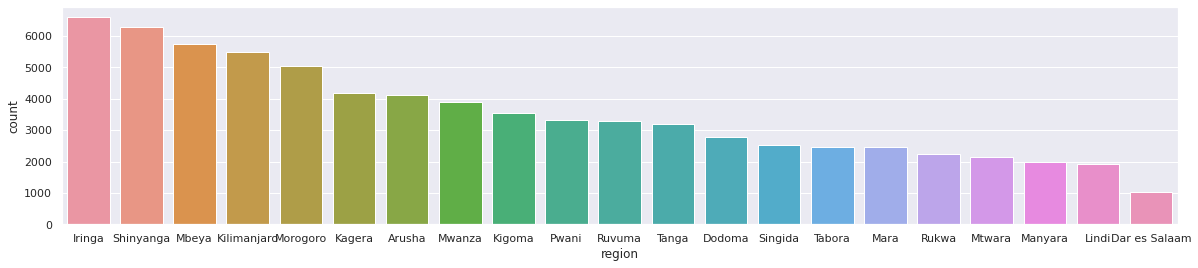

In [ ]:

# Categorical features of interest
sample_categorical_features = ['region']
for i in sample_categorical_features:
    print("***** \'{}\' feature distribution breakdown *****".format(i))
    #print(categorical_features_datata[i].value_counts())
    sns.set(style='darkgrid')
    fig = plt.figure(figsize = (20,4))
    sns.countplot(x=i,data=data, order = data[i].value_counts().index)
    plt.show()

In [ ]:
tanzania_flag_colors = ['#1eb53a', '#fcd116', '#00a3dd', 'black']

Text(0.5, 1.0, 'Public Meeting')

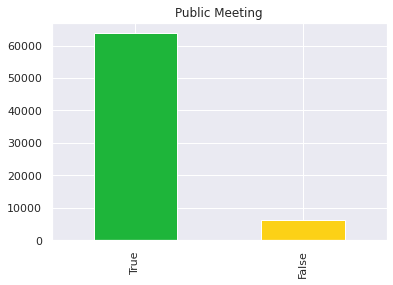

In [ ]:
data.public_meeting.value_counts().plot(kind='bar', color=tanzania_flag_colors);
plt.title("Public Meeting")

***** 'scheme_management' feature distribution breakdown *****


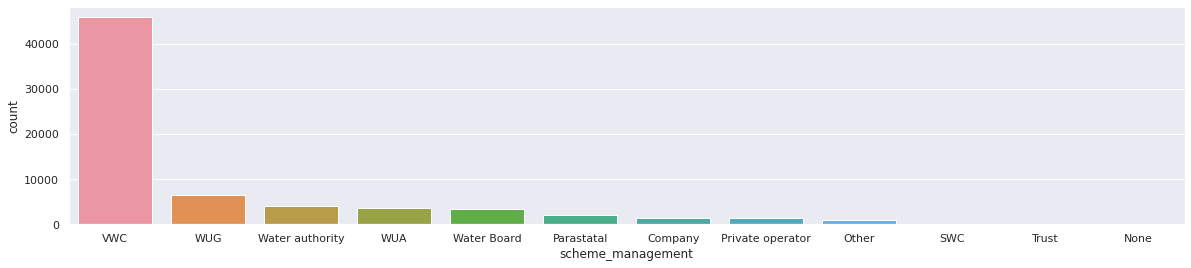

In [ ]:
# Categorical features of interest
sample_categorical_features = ['scheme_management']
for i in sample_categorical_features:
    print("***** \'{}\' feature distribution breakdown *****".format(i))
    #print(categorical_features_data[i].value_counts())
    sns.set(style='darkgrid')
    fig = plt.figure(figsize = (20,4))
    sns.countplot(x=i,data=data, order = data[i].value_counts().index)
    plt.show()

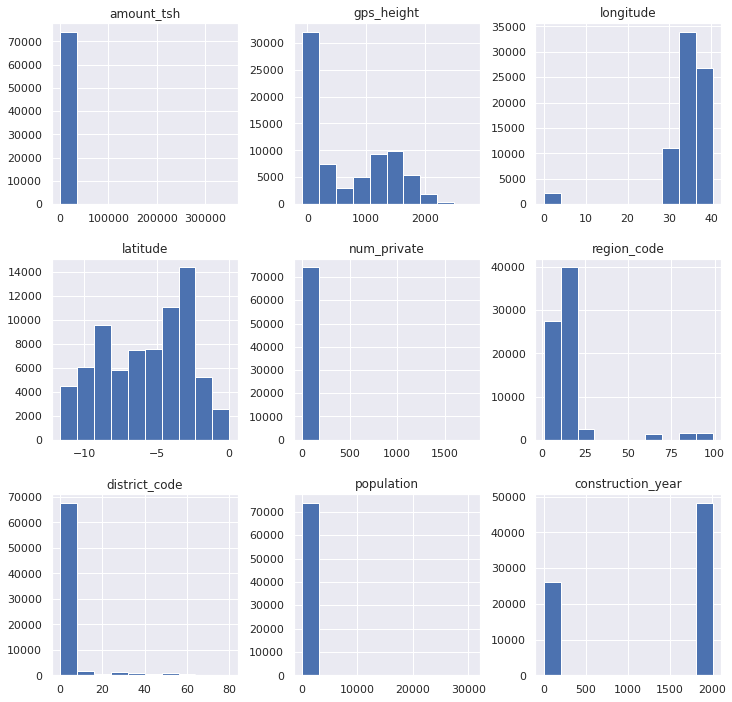

In [ ]:
data.hist(figsize=(12,12))
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


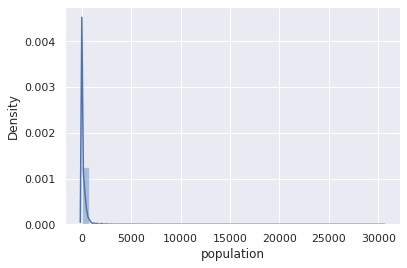

In [ ]:

sns.distplot(data.population, bins = 40)
plt.show()

In [ ]:
from collections import namedtuple, Counter, OrderedDict

def chist(catvar, alphalev=1): 
    hist = Counter(catvar)
    hist = OrderedDict(sorted(hist.items()))
    plt.bar(range(len(hist)), hist.values(), alpha=alphalev)
    plt.xticks([i for i in range(len(hist))], hist.keys(), rotation=90)
    plt.xlim([-1, len(hist)]);

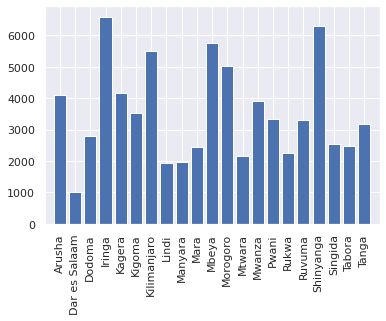

In [ ]:
# Distribution of regions
chist(data.region)

In [ ]:

#let's check the categorical features
numerical_features_data = data.select_dtypes(include=['int64','float64']).copy()
numerical_features_data.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,0.0,0,31.130847,-1.825359,0,18,1,0,0


In [ ]:
data.groupby(['region_code', 'region']).size()


region_code  region       
1            Dodoma           2779
2            Arusha           3709
3            Kilimanjaro      5494
4            Tanga            3145
5            Morogoro         5038
             Tanga              41
6            Pwani            2032
7            Dar es Salaam    1020
8            Lindi             375
9            Mtwara            499
10           Ruvuma           3306
11           Iringa           6599
             Shinyanga           9
12           Mbeya            5758
             Mwanza              1
13           Singida          2536
14           Shinyanga          22
             Tabora           2466
15           Rukwa            2242
16           Kigoma           3533
17           Mwanza             72
             Shinyanga        6262
18           Kagera           4174
             Lindi               9
19           Mwanza           3824
20           Mara             2451
21           Manyara          1972
24           Arusha         

In [ ]:
data.status_group.replace({'non functional': 'needs repair', 'functional needs repair': 'needs repair'}, inplace=True)

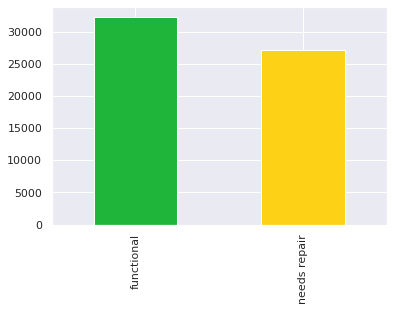

In [ ]:
data.status_group.value_counts().plot(kind='bar', color=tanzania_flag_colors);


Change status_group to binary variables

In [ ]:
data.status_group.replace({'functional': 1, 'needs repair': 0}, inplace=True)

In [ ]:
data.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

Duplicated value

In [ ]:
# now check for duplicates
data.duplicated().sum()

37

Null Value

In [ ]:
# Check for nulls.

data.apply(lambda x: sum(x.isnull()))

amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [ ]:
# Function that displays all columns and rows when you use commands like data.head() and data_tail().

def display_all(data):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(data)

In [ ]:
from IPython.display import display

# Displays columns on the side instead of the top.

display_all(data.head().transpose())

,0,1,2,3,4
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria


##Missing value Impute

In [ ]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def funder_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
data['funder'] = data.apply(lambda row: funder_wrangler(row), axis=1)

In [ ]:
data.installer.value_counts()

DWE                         21751
Government                   2282
RWE                          1498
Commu                        1347
DANIDA                       1305
                            ...  
Sisal Estste Hale               1
Grail Mission Kiseki bar        1
Hanja                           1
Water Hu                        1
Lench                           1
Name: installer, Length: 2410, dtype: int64

In [ ]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def installer_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'    
    else:
        return 'other'
    
data['installer'] = data.apply(lambda row: installer_wrangler(row), axis=1)

In [ ]:
#Drop Subvillage

data = data.drop('subvillage', axis=1)

In [ ]:
# Replace Public_meeting missing values by unknown

data.public_meeting = data.public_meeting.fillna('Unknown')

In [ ]:

data.scheme_management.value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [ ]:

def scheme_management_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'    
    else:
        return 'other'
    
data['scheme_management'] = data.apply(lambda row: scheme_management_wrangler(row), axis=1)

In [ ]:
data.scheme_name.value_counts()

K                        858
None                     794
Borehole                 704
Chalinze wate            501
M                        490
                        ... 
BL Moniko shule            1
Chepete water supply       1
Iwil                       1
Kianama spring source      1
BL Majengo                 1
Name: scheme_name, Length: 2868, dtype: int64

In [ ]:
#Drop scheme_name

data = data.drop('scheme_name', axis=1)

In [ ]:
#Replace permit missing values by unknown

data.permit = data.permit.fillna('Unknown')

In [ ]:
# Check for nulls.

data.apply(lambda x: sum(x.isnull()))

amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source  

In [ ]:

#View all the cateforical Value
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

,date_recorded,funder,installer,wpt_name,basin,region,lga,ward,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,other,other,none,Lake Nyasa,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,vwc,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,other,other,Zahanati,Lake Victoria,Mara,Serengeti,Natta,Unknown,GeoData Consultants Ltd,other,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,other,other,Kwa Mahundi,Pangani,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,vwc,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,other,other,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,vwc,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,other,other,Shuleni,Lake Victoria,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,other,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:

#View object columns
obj_data.columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [ ]:

# Allocate dataset, first 1460 rows contain Saleprice, and remainning doesn't have SalePrice.
N_train = 14850
status_group_data = data[:N_train]
status_group_predict = data[N_train:]


print("Missing values for status_group_data:", np.any(status_group_data.isnull().values))
print("Missing values for the test:", np.any(status_group_predict.isnull().values))

Missing values for status_group_data: False
Missing values for the test: True


In [ ]:

#Load Liabry
import copy 

#Allocate variable to X and target variable 'Statusgroup' to y 
y = status_group_data[(['status_group'])]
X = copy.deepcopy(status_group_data).drop(['status_group'], axis=1)
X_predict_statusgroup = copy.deepcopy(status_group_predict).drop(['status_group'], axis=1)



In [ ]:
X = pd.get_dummies(X)

In [ ]:
y

,status_group
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
14845,1.0
14846,0.0
14847,0.0
14848,1.0


In [ ]:
#Create dummy variable for all object columns
#waterpump_data = pd.get_dummies(data=X, columns=['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 
                                                           'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type',
                                                           'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 
                                                           'waterpoint_type_group'], drop_first=True)

In [ ]:
X.head(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,date_recorded_2002-10-14,date_recorded_2004-04-05,date_recorded_2004-05-01,date_recorded_2004-06-01,date_recorded_2004-08-01,date_recorded_2004-12-01,date_recorded_2011-01-03,date_recorded_2011-01-04,date_recorded_2011-01-08,date_recorded_2011-02-02,date_recorded_2011-02-03,date_recorded_2011-02-04,date_recorded_2011-02-14,date_recorded_2011-02-15,date_recorded_2011-02-16,date_recorded_2011-02-17,date_recorded_2011-02-18,date_recorded_2011-02-19,date_recorded_2011-02-20,date_recorded_2011-02-21,date_recorded_2011-02-22,date_recorded_2011-02-23,date_recorded_2011-02-24,date_recorded_2011-02-25,date_recorded_2011-02-26,date_recorded_2011-02-27,date_recorded_2011-02-28,date_recorded_2011-03-01,date_recorded_2011-03-02,date_recorded_2011-03-03,date_recorded_2011-03-04,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: status_group, dtype: float64

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

s_scaler = StandardScaler()
standard_X = s_scaler.fit_transform(X)

In [ ]:
standard_df = pd.DataFrame(standard_X, index=X.index, columns=X.columns)

In [ ]:

#Load the Libraries
from sklearn.model_selection import train_test_split 
#Split the data set 
X_train, X_test, y_train, y_test = train_test_split(standard_df, y, test_size=.20, random_state=19)

Vanilla Decision Tree Classifier with standard scaled data

In [ ]:
dt = DecisionTreeClassifier(random_state=19)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [ ]:
y_preds = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_preds)

0.7757575757575758

In [ ]:
f1_score(y_test, y_preds, average='micro')

0.7757575757575758

In [ ]:

rf = RandomForestClassifier(random_state=19)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=19, verbose=0,
                       warm_start=False)

In [ ]:

y_preds = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[1038  329]
 [ 228 1375]]
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1367
         1.0       0.81      0.86      0.83      1603

    accuracy                           0.81      2970
   macro avg       0.81      0.81      0.81      2970
weighted avg       0.81      0.81      0.81      2970



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

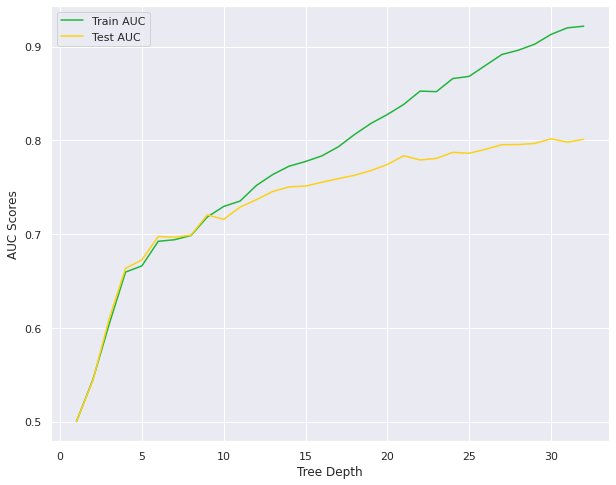

In [ ]:
# Visualize effect of different max_depths on AUC scores

max_depths = np.linspace(1,32,32,endpoint=True)
train_auc = []
test_auc = []

for depth in max_depths:
    
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    fpr, tpr, thresh = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_auc.append(roc_auc)
    
    test_pred = rf.predict(X_test)
    fpr, tpr, thresh = roc_curve(y_test, test_pred)
    roc_auc = auc(fpr, tpr)
    test_auc.append(roc_auc)

plt.figure(figsize=(10,8))
plt.plot(max_depths, train_auc, color=tanzania_flag_colors[0], label='Train AUC')
plt.plot(max_depths, test_auc, color=tanzania_flag_colors[1], label='Test AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Scores')
plt.legend(loc='best')
plt.show();

In [ ]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression()

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# This is a regression, so it has coefficients -- lets see them
# Note, there is no easy way to show significance, etc. with sklearn
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (10 largest and 10 smallest) [recall, there are 252 of them, in total: ')
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top10positive = summary.head(10) # 10 largest (by value)
top10negative = summary.tail(10) # 10 smallest (by value)
top10list=pd.DataFrame()
top10list= top10list.append(pd.DataFrame(data = top10positive))
top10list= top10list.append(pd.DataFrame(data = top10negative))
top10list

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Intercept: [0.4790569]
Coefficients (10 largest and 10 smallest) [recall, there are 252 of them, in total: 


,Variable,Coefficient
13234,scheme_management_wtr_brd,1.06716
56,date_recorded_2011-03-21,1.00756
240,date_recorded_2013-01-23,0.865599
13323,quantity_enough,0.790092
13328,quantity_group_enough,0.790092
282,date_recorded_2013-03-06,0.773051
13281,management_private operator,0.770167
11419,ward_Chanzuru,0.767669
0,amount_tsh,0.721565
124,date_recorded_2011-08-02,0.69702


In [ ]:
# Use the trained model to predict testing data

y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities

# Select the threshold value -- we will use Т=0.6073. Why? Why not 50%? Because 60.73% -- is the average probability of retention in our data (1451 "1"s out of 2389 datapoints) 
class_threshold = 0.6073

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities 
print(y_pred[0:5]) # resultant predicted classification 
print(y_test[0:5]) # actual outcomes

# oops ... for the first 5 customers our model made two mistakes: on 1st customer ("false positive") and on 3rd customer ("false negative")

[0.99999445 0.99999765 0.57593712 0.99984182 0.99997148]
[1 1 0 1 1]
       status_group
2077            1.0
2952            1.0
12994           1.0
11554           1.0
8968            1.0


In [ ]:
 # ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

 
 
 
 
 #Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

Metrics of the logistic regression model: 

Confusion matrix: 
[[ 915  424]
 [ 452 1179]]
                                   Accuracy: 0.705050505050505
                   SENSITIVITY (aka RECALL): 0.735495945102932
                 SPECIFICITY (aka FALL-OUT): 0.6693489392831017
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.7228694052728387
                 NEGATIVE PREDICTIVE VALUE): 0.6833457804331591


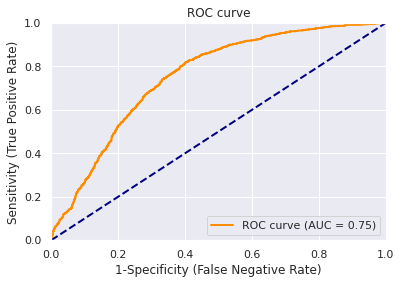

 AUC: 0.7544883153888945


In [ ]:



# Lets look at the model metrics 
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=77300, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[1075  402]
 [ 292 1201]]
                                   Accuracy: 0.7663299663299663
                   SENSITIVITY (aka RECALL): 0.7492202121023082
                 SPECIFICITY (aka FALL-OUT): 0.7863935625457206
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8044206296048225
                 NEGATIVE PREDICTIVE VALUE): 0.7278266756939743


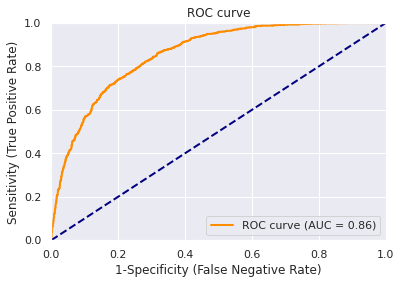

 AUC: 0.8581691880759421


In [ ]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))